In [59]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from datetime import datetime

from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, scale
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.utils import shuffle 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn import preprocessing, metrics


import warnings
warnings.filterwarnings("ignore")

# Analyze and Model

This notebook takes the clean, labeled data from the "clean" notbook and does the analysis and modeling.

In [5]:
df = pd.read_csv('data/clean_vehicles.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363278 entries, 0 to 363277
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    363278 non-null  int64 
 1   price         363278 non-null  int64 
 2   year          363278 non-null  int64 
 3   condition     363278 non-null  object
 4   cylinders     363278 non-null  object
 5   fuel          363278 non-null  object
 6   odometer      363278 non-null  int64 
 7   title_status  363278 non-null  object
 8   transmission  363278 non-null  object
 9   drive         363278 non-null  object
 10  size          363278 non-null  object
 11  type          363278 non-null  object
 12  paint_color   363278 non-null  object
 13  age           363278 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


In [7]:
df.drop(df.columns[[0]], axis = 1, inplace=True)

Dropping title_status and paint_color to simplify modeling

In [8]:
df.drop(['title_status', 'paint_color'], axis=1, inplace=True)

In [9]:
df.head()

,price,year,condition,cylinders,fuel,odometer,transmission,drive,size,type,age
0,15000,2013,excellent,6 cylinders,gas,128000,automatic,rwd,full-size,truck,10
1,27990,2012,good,8 cylinders,gas,68696,other,4wd,full-size,pickup,11
2,34590,2016,good,6 cylinders,gas,29499,other,4wd,full-size,pickup,7
3,35000,2019,excellent,6 cylinders,gas,43000,automatic,4wd,full-size,truck,4
4,29990,2016,good,6 cylinders,gas,17302,other,4wd,full-size,pickup,7


## Exploratory Data Analysis

In [10]:
df.sample(25)

,price,year,condition,cylinders,fuel,odometer,transmission,drive,size,type,age
339826,12495,2013,new,8 cylinders,gas,119443,automatic,fwd,sub-compact,coupe,10
210975,24990,2019,good,6 cylinders,gas,8629,other,fwd,full-size,hatchback,4
112566,36999,2017,new,4 cylinders,gas,48827,automatic,4wd,full-size,truck,6
353112,13495,2017,new,8 cylinders,gas,59850,automatic,fwd,full-size,wagon,6
272041,9995,2010,excellent,4 cylinders,gas,166875,automatic,4wd,mid-size,SUV,13
233325,10985,2012,new,6 cylinders,gas,93192,manual,fwd,compact,SUV,11
24083,18997,2017,new,6 cylinders,gas,91269,automatic,4wd,mid-size,SUV,6
73638,32000,2014,new,6 cylinders,gas,48701,automatic,4wd,mid-size,pickup,9
80326,56990,2019,good,8 cylinders,gas,4052,other,rwd,mid-size,coupe,4
165148,9981,2015,excellent,4 cylinders,gas,71435,automatic,4wd,full-size,SUV,8


In [11]:
df.describe()

,price,year,odometer,age
count,363278.000000,363278.000000,363278.000000,363278.000000
mean,19601.382324,2012.126289,90901.849493,10.873711
std,14771.472302,6.310944,59501.153999,6.310944
min,1000.000000,1980.000000,0.000000,1.000000
25%,7995.000000,2009.000000,38398.000000,6.000000
50%,15995.000000,2013.000000,87200.000000,10.000000
75%,27995.000000,2017.000000,134373.000000,14.000000
max,199999.000000,2022.000000,250000.000000,43.000000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'odometer'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

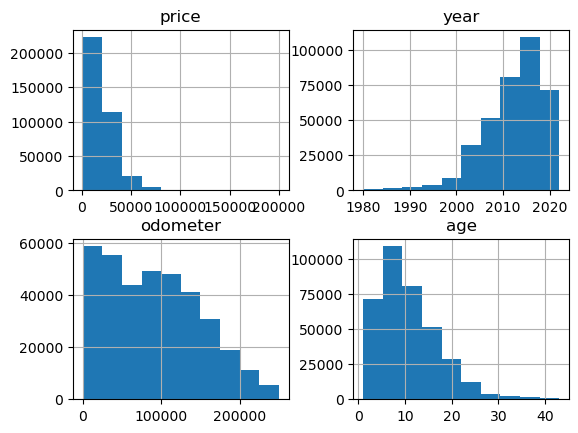

In [12]:
df.hist()

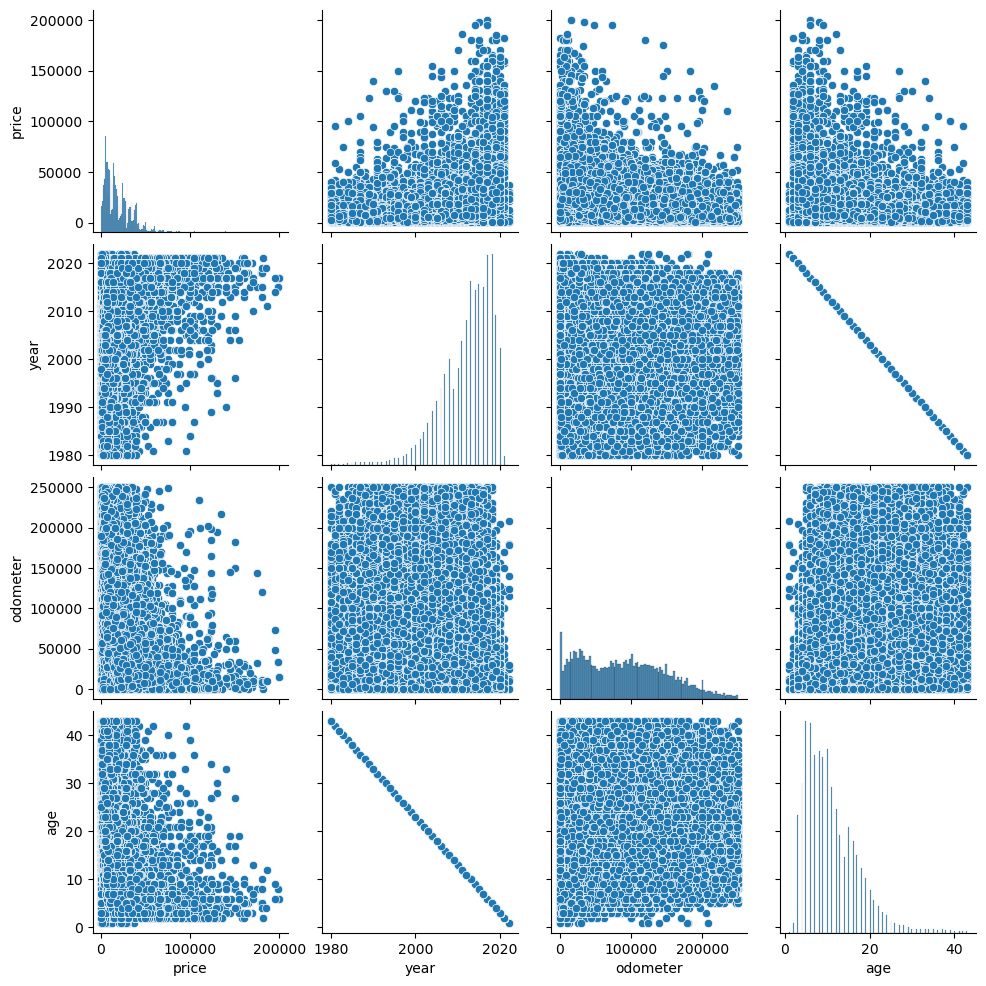

In [13]:
sns.pairplot(df)

In [14]:
df.corr()

,price,year,odometer,age
price,1.000000,0.541948,-0.545168,-0.541948
year,0.541948,1.000000,-0.568561,-1.000000
odometer,-0.545168,-0.568561,1.000000,0.568561
age,-0.541948,-1.000000,0.568561,1.000000


## Encode the catagorical features

In [19]:
le = preprocessing.LabelEncoder()

df[['condition', 'cylinders', 'fuel', 'transmission','drive','size', 'type']] = df[['condition', 'cylinders', 'fuel', 'transmission','drive','size', 'type']].apply(le.fit_transform)


## Split the data

In [22]:
y = df.price
X = df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(254294, 10) (254294,)
(108984, 10) (108984,)


In [23]:
sc = StandardScaler()

X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [24]:
X_train

array([[ 0.93105439,  1.07096264, -1.32957319, ..., -1.60706716,
         0.74002224, -0.93105439],
       [ 0.45533092,  1.07096264,  0.28741866, ..., -0.24622556,
         0.48823843, -0.45533092],
       [-0.33754153, -1.48164864,  0.28741866, ..., -0.24622556,
         0.74002224,  0.33754153],
       ...,
       [ 0.29675643, -1.48164864,  1.09591458, ...,  1.11461603,
        -0.77068058, -0.29675643],
       [ 0.29675643, -0.205343  ,  1.09591458, ..., -0.24622556,
         0.99180604, -0.29675643],
       [-2.87473337, -0.205343  ,  1.09591458, ..., -0.24622556,
         0.99180604,  2.87473337]])

## Model Building

### OLS

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

rr = Ridge()
rr.fit(X_train, y_train)
rr_pred = rr.predict(X_test)
rr_rmse = np.sqrt(mean_squared_error(y_test, rr_pred))

print("LR RMSE = {:.2f}".format((lr_rmse)))
print("RR RMSE = {:.2f}".format((rr_rmse)))

LR RMSE = 10668.94
RR RMSE = 10668.91


In [28]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

#To retrieve the intercept:
print("Regressor intercept = {:.2f}".format((regressor.intercept_)))


Regressor intercept = 19608.38


##### Show most significant features

In [29]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
year,-4.771077e+12
condition,1.008504e+03
cylinders,2.943553e+03
fuel,-2.821342e+03
odometer,-5.396805e+03
transmission,8.019926e+02
drive,-1.396007e+03
size,-1.250609e+02
type,3.510871e+02
age,-4.771077e+12


In [31]:
OLS_preds = regressor.predict(X_train)
y_preds = regressor.predict(X_test)

##### Plot Actuals vs Predictions

<Axes: >

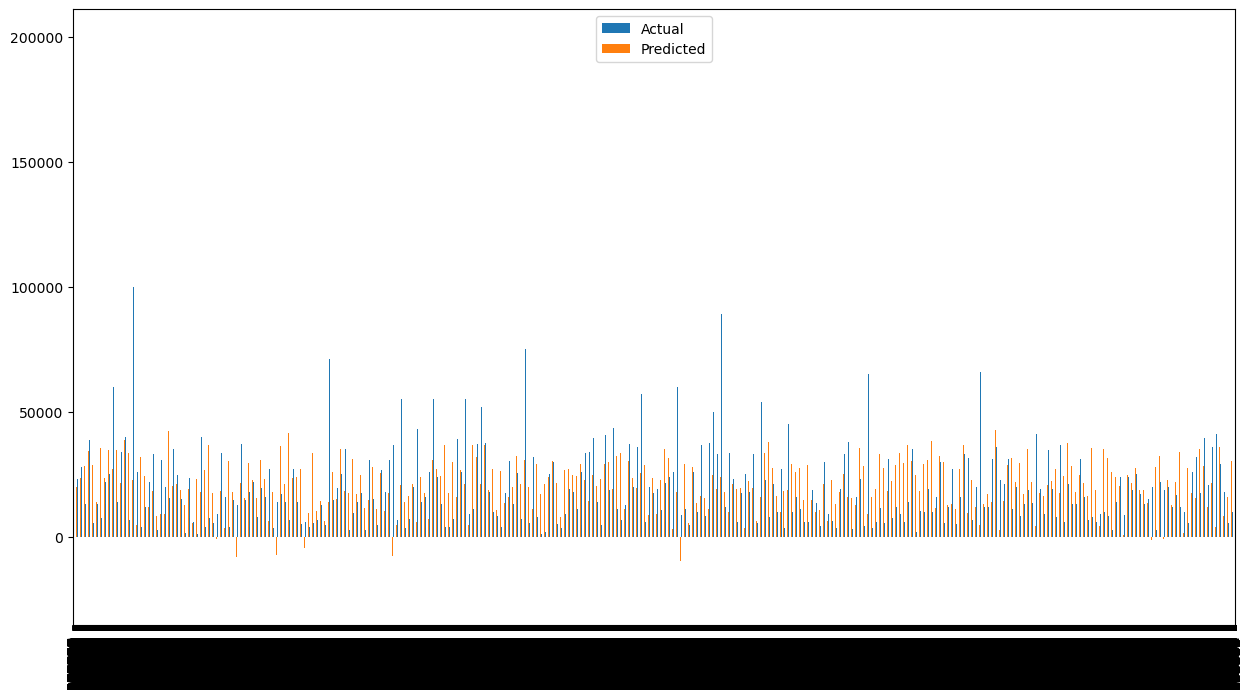

In [39]:
OLS_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})
OLS_df.plot(kind='bar',
            figsize=(15,8),
            title='OLS Actual vs Predicted')

### Ridge Regresssion

In [42]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)
   

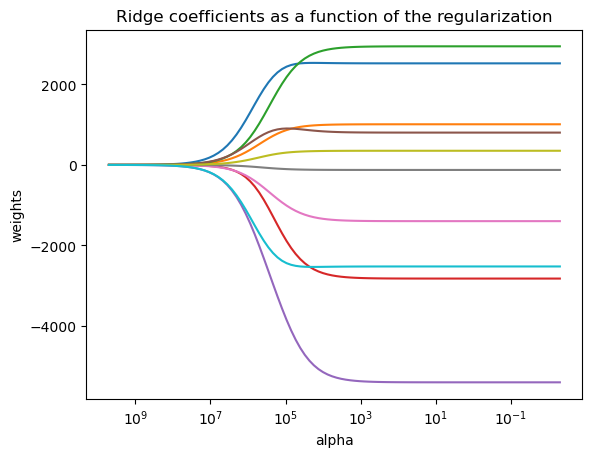

In [45]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

##### Find best alpha

In [54]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')

ridgecv.fit(X_train, y_train)
ridgecv.alpha_

28.6118382967511

##### Show most significant features

In [56]:
rcv_preds = ridgecv.predict(X_test)
print(pd.Series(ridgecv.coef_, index = X.columns))

year            2520.827139
condition       1008.449554
cylinders       2943.254589
fuel           -2820.937114
odometer       -5396.027975
transmission     802.085435
drive          -1395.835052
size            -125.038170
type             351.065134
age            -2520.827139
dtype: float64


##### Plot feature importance

Text(0.5, 1.0, 'Feature importance using Ridge Model')

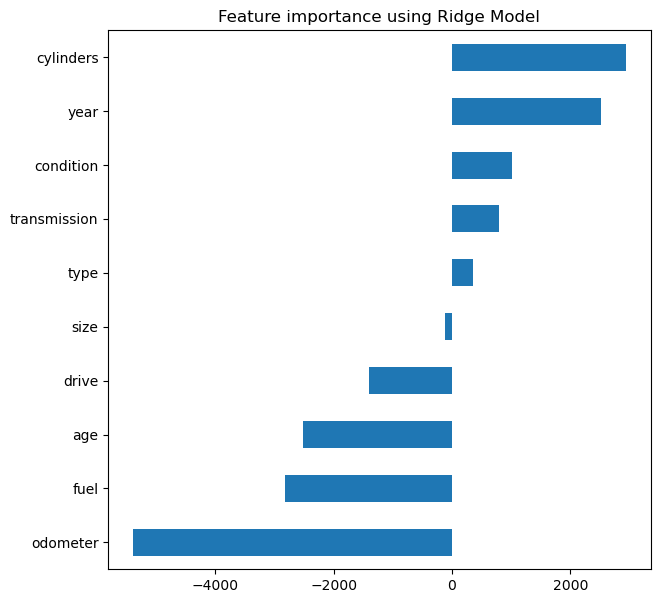

In [57]:
coef_ridge= pd.Series(ridgecv.coef_, index = X.columns)
imp_coef = coef_ridge.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (7.0, 7.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance for Ridge Model")

### Lasso

In [63]:
lasso = Lasso(max_iter = 10000)
coefs = []
alphas= np.logspace(-1,2,100)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


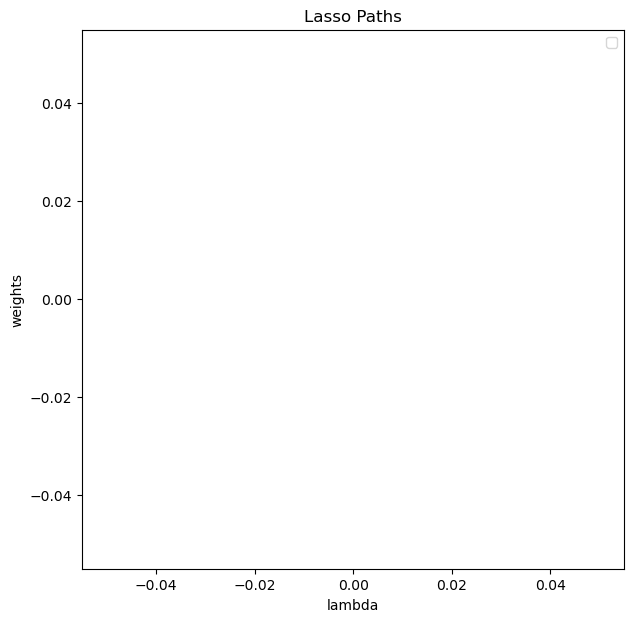

In [64]:
x = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso Paths')
plt.legend()

In [68]:
lassocv = LassoCV( alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % lassocv.alpha_)
print("Best score using built-in LassoCV: %f" % lassocv.score(X_train,y_train))
coef = pd.Series(lassocv.coef_, index = X.columns)
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, lassocv.predict(X_test))),2))

Best alpha using built-in LassoCV: 8.073601
Best score using built-in LassoCV: 0.471605
Root Mean Squared Error: 10669.0


In [70]:
lcv_preds = lassocv.predict(X_test)

In [71]:
lassocv.alpha_

8.073600824486977

#### Show most significant features

In [72]:
coef

year            5038.145466
condition       1001.420581
cylinders       2937.350684
fuel           -2810.660695
odometer       -5392.414117
transmission     792.694709
drive          -1387.152538
size            -117.453220
type             343.893086
age               -0.000000
dtype: float64

##### Plot feature importance

Text(0.5, 1.0, 'Feature importance for Lasso Model')

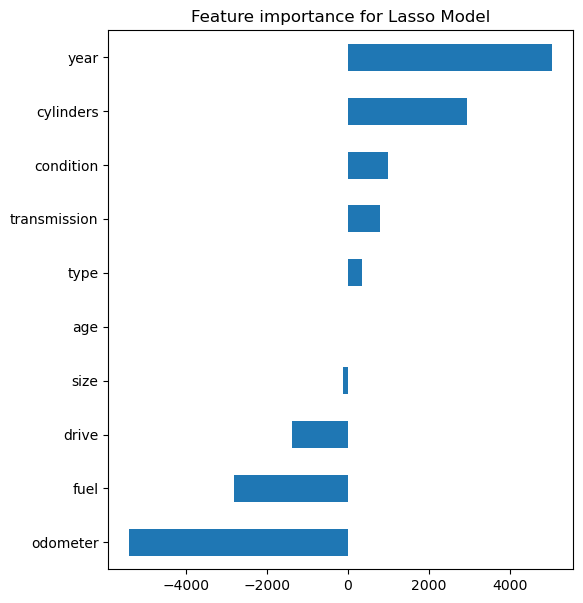

In [73]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 7.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance for Lasso Model")

## Summary comparison of errors

In [74]:
print("==== OLS Error====")
print('OLS Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_preds),2))
print('OLS Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_preds),2))
print('OLS Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_preds)),2))
print(" ")
print("==== Ridge Error====")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, rcv_preds),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, rcv_preds),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, rcv_preds)),2))
print(" ")
print("==== Lasso Error====")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, lcv_preds),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, lcv_preds),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, lcv_preds)),2))

==== OLS Error====
OLS Mean Absolute Error: 7470.73
OLS Mean Squared Error: 113826242.62
OLS Root Mean Squared Error: 10668.94
 
==== Ridge Error====
Mean Absolute Error: 7470.61
Mean Squared Error: 113825639.93
Root Mean Squared Error: 10668.91
 
==== Lasso Error====
Mean Absolute Error: 7471.03
Mean Squared Error: 113827606.77
Root Mean Squared Error: 10669.0


In [ ]:
error_data = {'OLS':[round(metrics.mean_absolute_error(y_test, y_preds),2), round(metrics.mean_squared_error(y_test, y_preds),2), round(np.sqrt(metrics.mean_squared_error(y_test, y_preds)),2)]